In [1]:
include("dsm.jl")

import dsm
import PyPlot

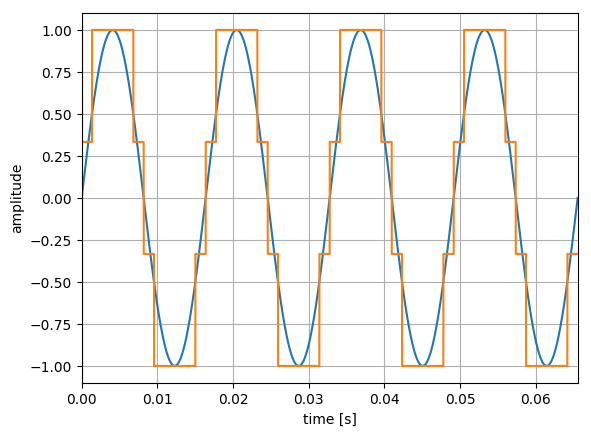

In [2]:
f_s = 1e6;
T_s = 1/f_s;

n_fft = 2^16;        # number of fft points
n_ini = 0;           # number of initial points for settling
k = 4;

f_i = f_s/n_fft*k;   # input frequency
a_i = 1;             # input amplitude
b_i = 0;             # input offset
n_i = 0;             # input noise power

osr = 256;
f_bw= (f_s/2)/osr;

t = 0:T_s:T_s*(n_fft+n_ini-1);
inp = a_i*sin.(2*pi*f_i*t) + b_i + n_i*randn(size(t));

inpq = dsm.quantize(inp, dsm.uniform_quantizer(2^2));

PyPlot.plot(t, inp);
PyPlot.hold(true);
PyPlot.plot(t, inpq);
PyPlot.hold(false);
PyPlot.grid();
PyPlot.xlim(0, T_s*(n_fft+n_ini-1));
PyPlot.xlabel("time [s]");
PyPlot.ylabel("amplitude");

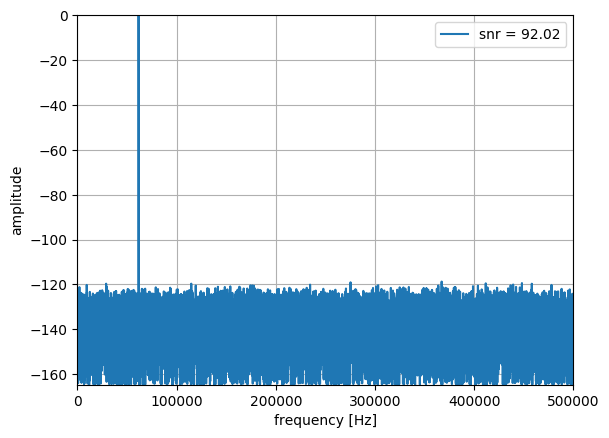

In [3]:
f_s = 1e6;
T_s = 1/f_s;

n_fft = 2^16;        # number of fft points
n_ini = 0;           # number of initial points for settling

k   = 4043;
f_i = f_s/n_fft*k;   # input frequency

a_i = 1;             # input amplitude
b_i = 0;             # input offset
n_i = 0;             # input noise power

osr = 256;
f_bw= (f_s/2)/osr;

t = 0:T_s:T_s*(n_fft+n_ini-1);
inp = a_i*sin.(2*pi*f_i*t) + b_i + n_i*randn(size(t));

inpq = dsm.quantize(inp, dsm.uniform_quantizer(2^15))
snrq = dsm.snr(inpq, f_i, f_s/2, f_s);

w = DSP.Windows.kaiser(n_fft, 20);
wf = mean(w);
Y_inp = fft(inp.*w)/n_fft/wf;
Y_inpq = fft(inpq.*w)/n_fft/wf

f = linspace(0, f_s/2, (n_fft/2+1));

PyPlot.plot(f[2:end], 20*log10.(2*abs.(Y_inpq[2:trunc(Int64, n_fft/2+1)])), label=@sprintf("snr = %.2f", snrq));
PyPlot.xlabel("frequency [Hz]");
PyPlot.ylabel("amplitude");
PyPlot.grid();
PyPlot.legend();
PyPlot.autoscale(tight=true)

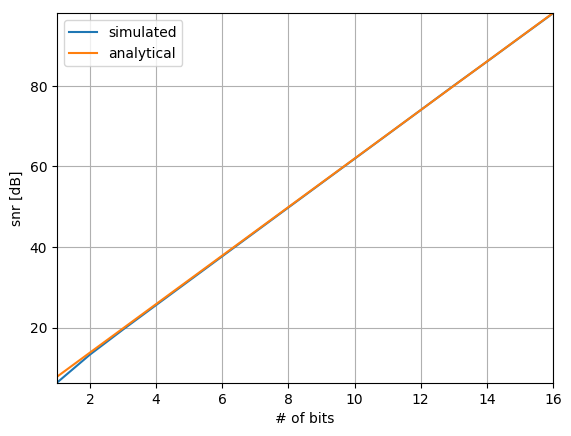

In [4]:
b_sw = [2^i for i = 1:16];

f_s = 1e6;
T_s = 1/f_s;

n_fft = 2^16;        # number of fft points
n_ini = 0;           # number of initial points for settling

k   = 4043;
f_i = f_s/n_fft*k;   # input frequency

a_i = 1;             # input amplitude
b_i = 0;             # input offset
n_i = 0;             # input noise power

osr = 256;
f_bw= (f_s/2)/osr;

t = 0:T_s:T_s*(n_fft+n_ini-1);
inp = a_i*sin.(2*pi*f_i*t) + b_i + n_i*randn(size(t));

snr = zeros(size(b_sw))
for i = 1:length(b_sw)
    inpq = dsm.quantize(inp, dsm.uniform_quantizer(b_sw[i]));
    snr[i] = dsm.snr(inpq, f_i, f_s/2, f_s);
end

PyPlot.plot(log2.(b_sw), snr, label="simulated")
PyPlot.hold(true)
PyPlot.plot(log2.(b_sw), 6.02*log2.(b_sw)+1.76, label="analytical")
PyPlot.hold(false)
PyPlot.xlabel("# of bits");
PyPlot.ylabel("snr [dB]");
PyPlot.grid();
PyPlot.legend();
PyPlot.autoscale(tight=true)